Accuracy: 0.7903340440653873
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
 [[932 101]
 [194 180]]

Top 5 Features Contributing to Churn:
           Feature  Importance
18    TotalCharges    0.184953
17  MonthlyCharges    0.178014
4           tenure    0.154510
14        Contract    0.080585
16   PaymentMethod    0.052031


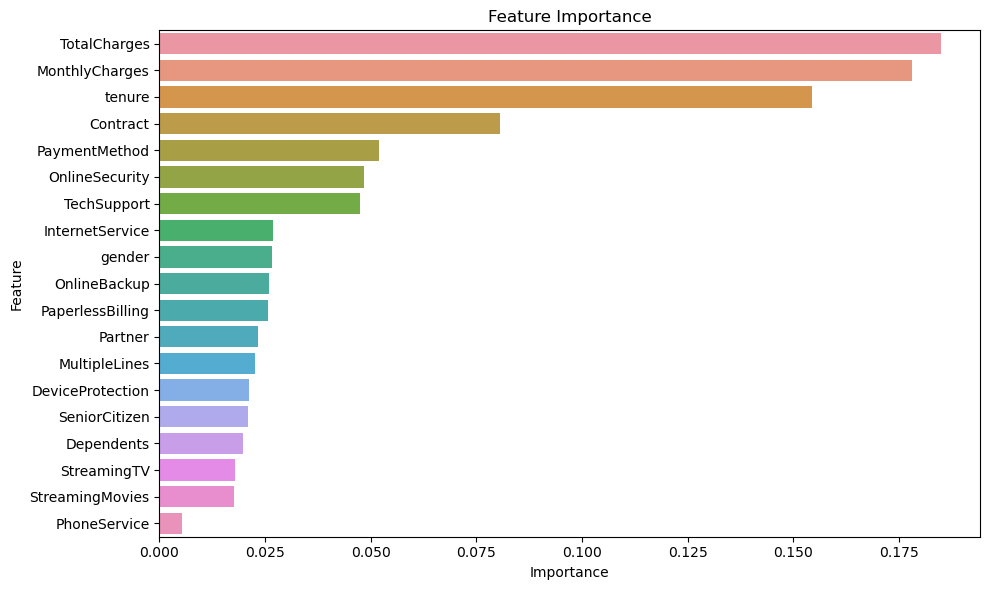

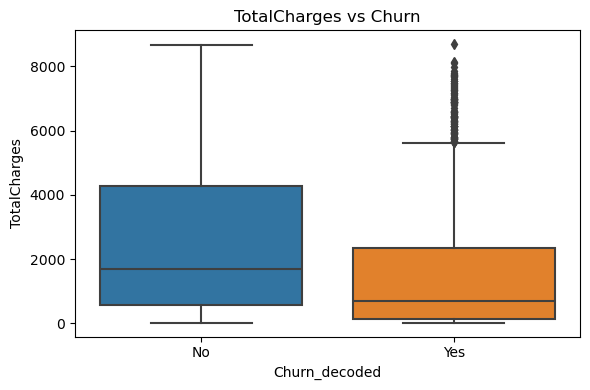

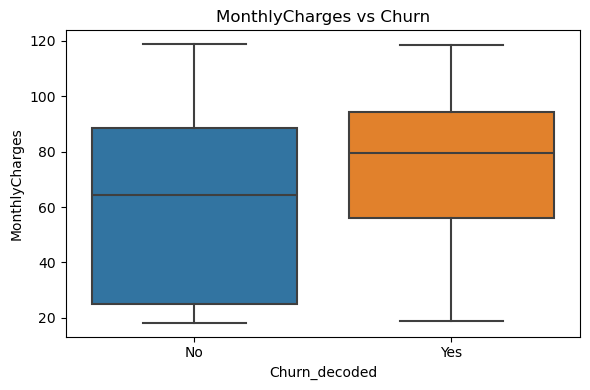

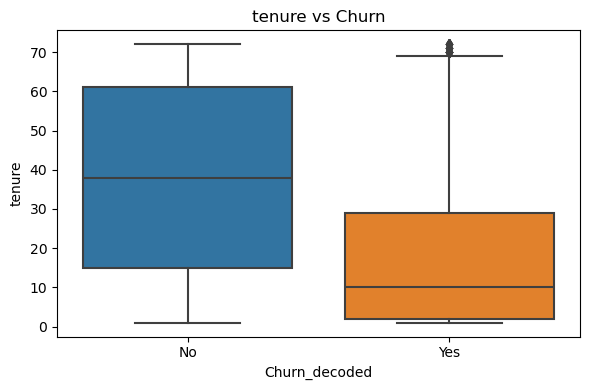

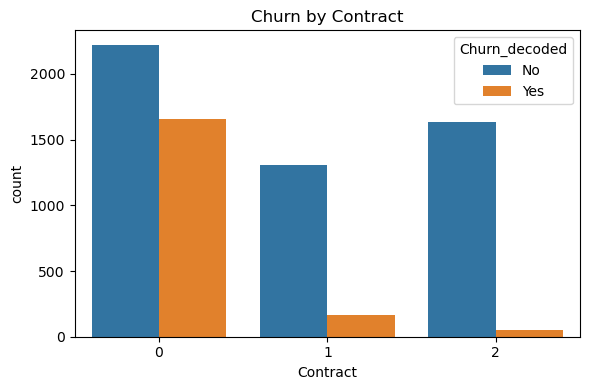

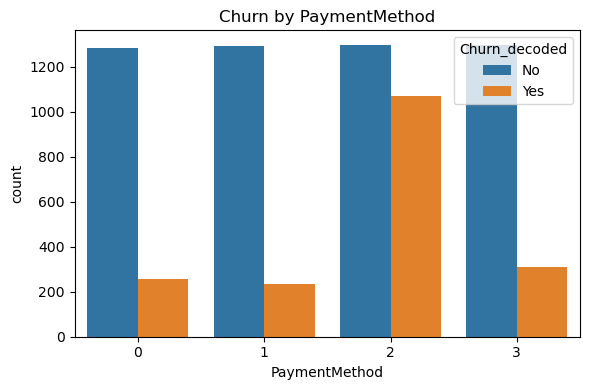


Churn rate by Contract (Proportion of Churned Customers):
Contract
0    0.43
1    0.11
2    0.03
Name: Churn, dtype: float64

Churn rate by InternetService (Proportion of Churned Customers):
InternetService
1    0.42
0    0.19
2    0.07
Name: Churn, dtype: float64

Churn rate by TechSupport (Proportion of Churned Customers):
TechSupport
0    0.42
2    0.15
1    0.07
Name: Churn, dtype: float64


C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


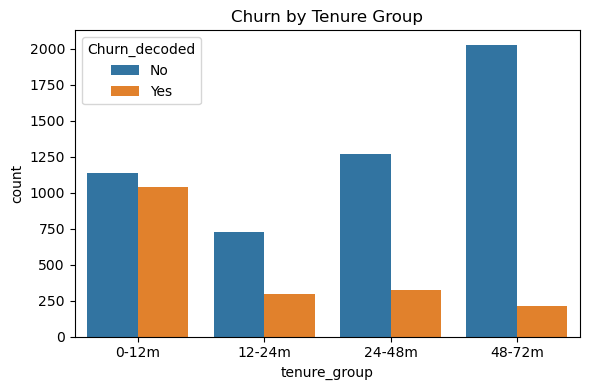

In [6]:
# Customer Churn Prediction Project

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Load dataset
# Dataset contains customer information for a telecom company, including churn status
df = pd.read_csv('./churnData.csv')

# Step 3: Data Cleaning
# Drop customerID as it's a unique identifier and not useful for prediction
df.drop('customerID', axis=1, inplace=True)

# Convert 'TotalCharges' to numeric (may contain non-numeric values like spaces)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values after conversion
df.dropna(inplace=True)

# Step 4: Encode categorical features
# Use LabelEncoder for binary and categorical text values
le = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = le.fit_transform(df[column])

# Keep a decoded version of Churn for visualization purposes
df['Churn_decoded'] = df['Churn'].map({1: 'Yes', 0: 'No'})

# Step 5: Split dataset into features (X) and target (y)
X = df.drop(['Churn', 'Churn_decoded'], axis=1)
y = df['Churn']

# Step 6: Train-Test Split
# Use 80-20 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Feature Scaling
# Normalize data for better performance of some ML algorithms
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Train Random Forest Classifier
# Chosen for its performance and interpretability
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 9: Evaluate the model
# Output metrics to understand performance
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 10: Feature Importance Analysis
# Identify which features contribute most to predicting churn
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("\nTop 5 Features Contributing to Churn:")
print(importance_df.head())

# Visualize feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Step 11: Visualize impact of top features on churn
# Boxplots for numeric features, countplots for categorical features
top_features = importance_df['Feature'].head(5).tolist()

for feature in top_features:
    if df[feature].nunique() <= 10:
        plt.figure(figsize=(6,4))
        sns.countplot(data=df, x=feature, hue='Churn_decoded')
        plt.title(f'Churn by {feature}')
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(6,4))
        sns.boxplot(data=df, x='Churn_decoded', y=feature)
        plt.title(f'{feature} vs Churn')
        plt.tight_layout()
        plt.show()

# Step 12: Churn rate by key categorical features
# Helps understand which service types or contract categories have high churn
def churn_rate_by_feature(df, feature):
    churn_rate = df.groupby(feature)['Churn'].mean().sort_values(ascending=False)
    print(f"\nChurn rate by {feature} (Proportion of Churned Customers):\n{churn_rate.round(2)}")

churn_rate_by_feature(df, 'Contract')
churn_rate_by_feature(df, 'InternetService')
churn_rate_by_feature(df, 'TechSupport')

# Step 13: Churn distribution by tenure groups
# Helps identify how long customers stay before leaving
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72], labels=['0-12m', '12-24m', '24-48m', '48-72m'])

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='tenure_group', hue='Churn_decoded')
plt.title('Churn by Tenure Group')
plt.tight_layout()
plt.show()

# END OF SCRIPT
# This notebook performs end-to-end churn prediction, EDA, feature engineering, model training, evaluation, and interpretation.
# Ideal for a beginner-to-intermediate level GitHub data science portfolio project.